# Music Gender Classification

Column details: artist name; track name; popularity; ‘danceability’; energy; key; loudness; mode; ‘speechiness’; ‘acousticness’; ‘instrumentalness’; liveness; valence; tempo; duration in milliseconds and time_signature.

Target Variable: 'Class’ such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood,

Dataset downloaded from https://www.kaggle.com/datasets/purumalgi/music-genre-classification

In [195]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from platform import python_version

In [196]:
print("Python: ", python_version())
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Seaborn: ", sns.__version__)
print("Matplotlib: ", matplotlib.__version__)

Python:  3.9.7
Pandas:  1.3.5
Numpy:  1.21.2
Seaborn:  0.11.2
Matplotlib:  3.5.1


In [197]:
data_df = pd.read_csv('data/train.csv')
data_df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [198]:
# Mapping genders to numbers for a better readability
classes = ['Acoustic', 'Alt', 'Blues', 'Bollywood', 'Country', 'HipHop', 'Indie', 'Instrumental', 'Metal', 'Pop', 'Rock']

In [199]:
data_df['Class'].nunique()

11

In [200]:
data_df['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

In [201]:
data_df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [202]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [203]:
# Checking number of missing values
data_df.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [204]:
# The number of nan is not that big, so I'm not going to drop it
perc = ((data_df.isna().sum() * 100) / data_df.shape[0])
perc

Artist Name            0.000000
Track Name             0.000000
Popularity             2.378306
danceability           0.000000
energy                 0.000000
key                   11.191376
loudness               0.000000
mode                   0.000000
speechiness            0.000000
acousticness           0.000000
instrumentalness      24.322072
liveness               0.000000
valence                0.000000
tempo                  0.000000
duration_in min/ms     0.000000
time_signature         0.000000
Class                  0.000000
dtype: float64

In [205]:
# true when there's at least one nan value
nan = data_df.isna().sum() > 0
print(nan)

Artist Name           False
Track Name            False
Popularity             True
danceability          False
energy                False
key                    True
loudness              False
mode                  False
speechiness           False
acousticness          False
instrumentalness       True
liveness              False
valence               False
tempo                 False
duration_in min/ms    False
time_signature        False
Class                 False
dtype: bool


In [206]:
# Obtaing nan cols to impute later, nan is the codition of missing value > 0
nan_cols = data_df.loc[:, nan].columns.tolist()
nan_cols

['Popularity', 'key', 'instrumentalness']

In [207]:
# Checking for duplicates
data_df[data_df.duplicated()]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


In [208]:
# Dropping Artist and Track because it's not relevant for training
data_df.drop(['Artist Name', 'Track Name'], axis=1, inplace=True)

In [209]:
visual_df = data_df.copy()

In [210]:
# Transform numbers to letters
visual_df['Class'] = visual_df['Class'].map(lambda x : classes[x])

In [211]:
visual_df['Class'].head()

0    HipHop
1      Rock
2     Indie
3    HipHop
4      Rock
Name: Class, dtype: object

## Visualizing

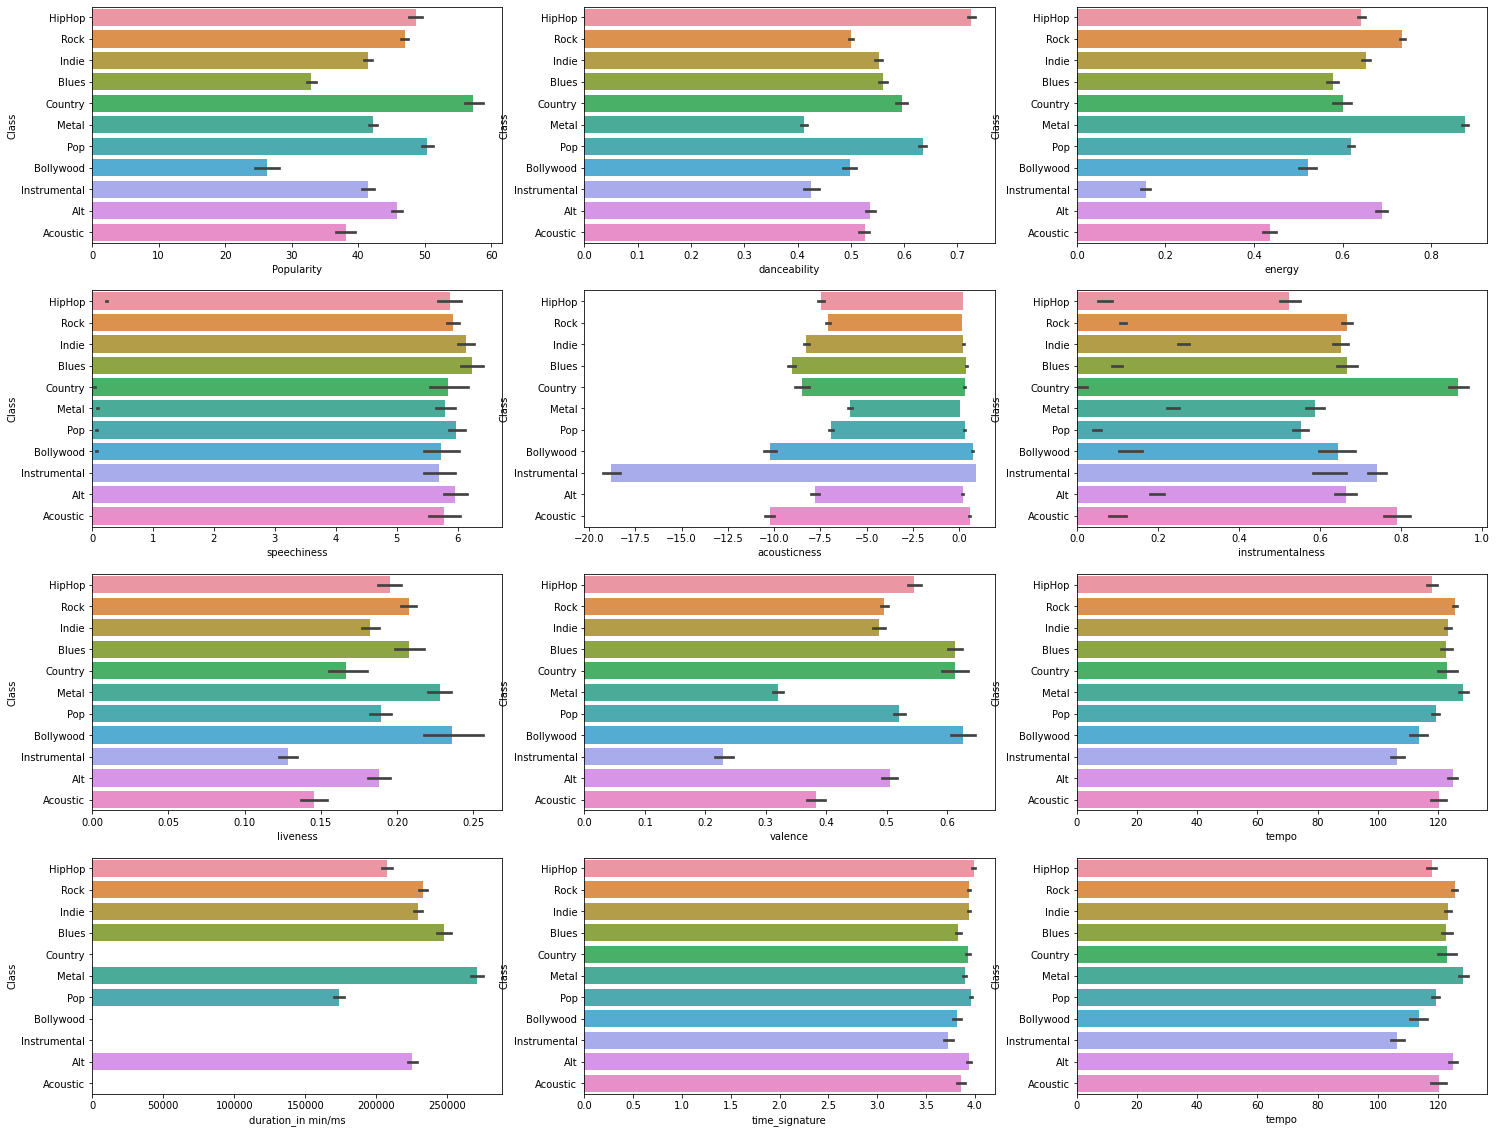

In [212]:
fig, ax = plt.subplots(4, 3, figsize=(25, 20))
sns.barplot(data=visual_df, x='Popularity', y='Class', ax=ax[0, 0])
sns.barplot(data=visual_df, x='danceability', y='Class', ax=ax[0, 1])
sns.barplot(data=visual_df, x='energy', y='Class', ax=ax[0, 2])

sns.barplot(data=visual_df, x='key', y='Class', ax=ax[1, 0])
sns.barplot(data=visual_df, x='loudness', y='Class', ax=ax[1, 1])
sns.barplot(data=visual_df, x='mode', y='Class', ax=ax[1, 2])

sns.barplot(data=visual_df, x='speechiness', y='Class', ax=ax[1, 0])
sns.barplot(data=visual_df, x='acousticness', y='Class', ax=ax[1, 1])
sns.barplot(data=visual_df, x='instrumentalness', y='Class', ax=ax[1, 2])

sns.barplot(data=visual_df, x='liveness', y='Class', ax=ax[2, 0])
sns.barplot(data=visual_df, x='valence', y='Class', ax=ax[2, 1])
sns.barplot(data=visual_df, x='tempo', y='Class', ax=ax[2, 2])

sns.barplot(data=visual_df, x='duration_in min/ms', y='Class', ax=ax[3, 0])
sns.barplot(data=visual_df, x='time_signature', y='Class', ax=ax[3, 1])
sns.barplot(data=visual_df, x='tempo', y='Class', ax=ax[3, 2])

plt.show();

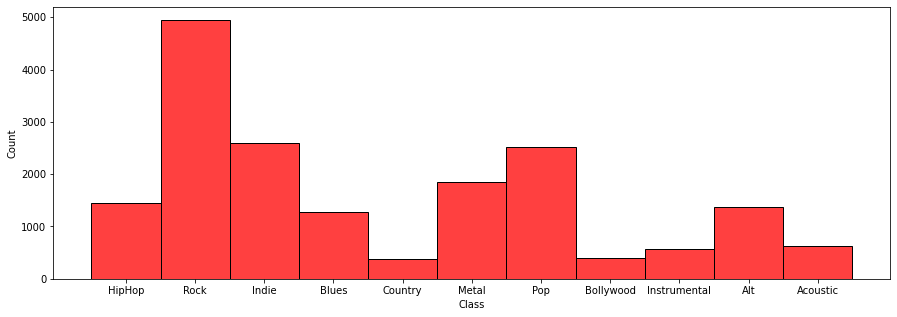

In [213]:
plt.figure(figsize=(15, 5))
sns.histplot(data=visual_df, x='Class', color='r')
plt.show();

<AxesSubplot:>

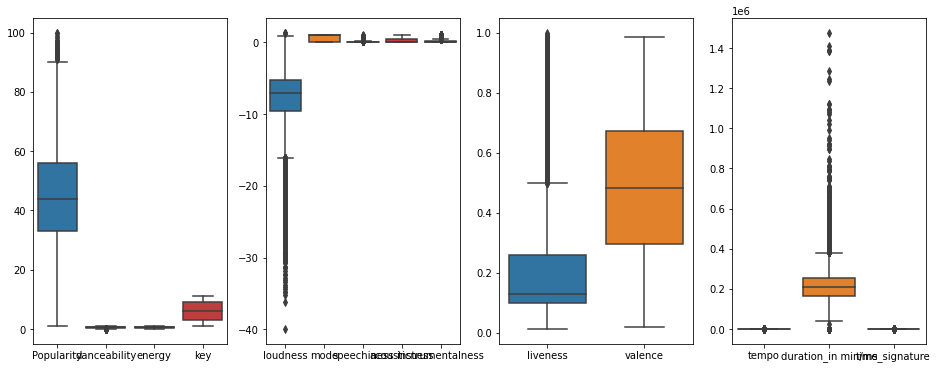

In [214]:
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
sns.boxplot(data=visual_df.iloc[:, 0:4], ax=ax[0])
sns.boxplot(data=visual_df.iloc[:, 4:9], ax=ax[1])
sns.boxplot(data=visual_df.iloc[:, 9:11], ax=ax[2])
sns.boxplot(data=visual_df.iloc[:, 11:], ax=ax[3])

## Removing null

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
sp = SimpleImputer(strategy='mean')

In [216]:
X = data_df.drop(['Class'], axis=1)
y = data_df['Class']

In [217]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=100)

In [218]:
X_train[nan_cols] = sp.fit_transform(X_train[nan_cols])
X_valid[nan_cols] = sp.transform(X_valid[nan_cols])

In [219]:
X_train.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [220]:
X_valid.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64

In [221]:
from tensorflow.keras.utils import to_categorical 

In [222]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [223]:
y_train.shape

(14396, 11)

In [224]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

<AxesSubplot:>

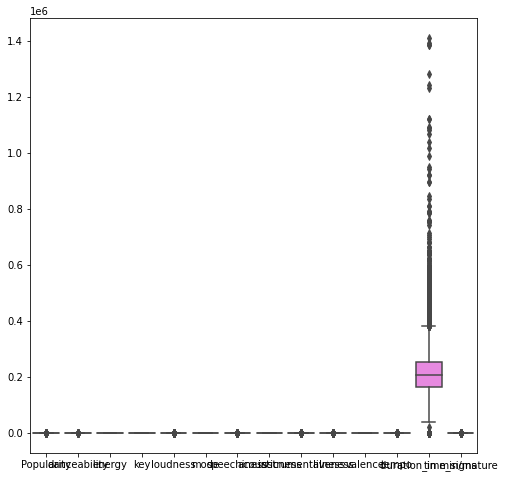

In [225]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=X_train)

<AxesSubplot:>

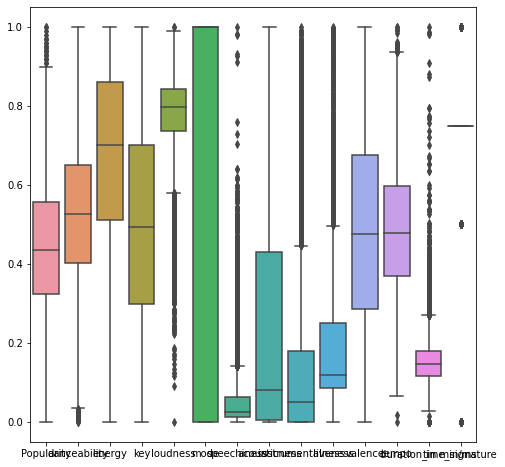

In [226]:
norm_train_df = pd.DataFrame(mms.fit_transform(X_train))
norm_train_df.index = X_train.index;
norm_train_df.columns = mms.get_feature_names_out()
X_train = norm_train_df

plt.figure(figsize=(8, 8))
sns.boxplot(data=X_train)

<AxesSubplot:>

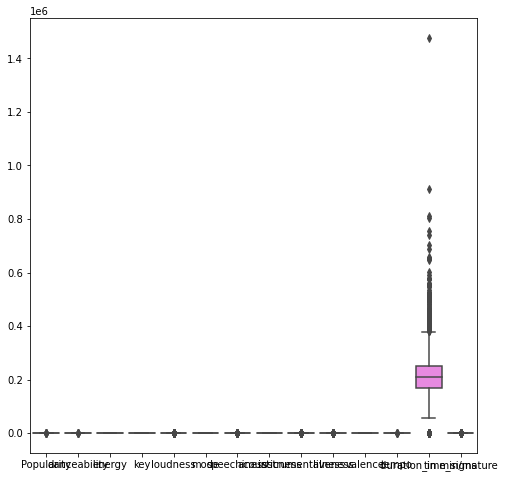

In [227]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=X_valid)

<AxesSubplot:>

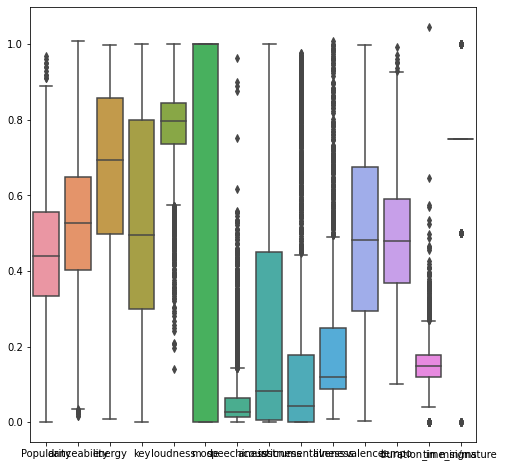

In [228]:
norm_valid_df = pd.DataFrame(mms.transform(X_valid))
norm_valid_df.index = X_valid.index;
norm_valid_df.columns = mms.get_feature_names_out()
X_valid = norm_valid_df

plt.figure(figsize=(8, 8))
sns.boxplot(data=X_valid)

## Build model

In [240]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [241]:
num_classes = y_train.shape[1]
num_classes 

11

In [274]:
model = Sequential()

model.add(Dense(12, activation='relu', input_shape=[X_train.shape[1], ]))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [275]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 12)                180       
                                                                 
 dense_38 (Dense)            (None, 30)                390       
                                                                 
 dense_39 (Dense)            (None, 30)                930       
                                                                 
 dense_40 (Dense)            (None, 11)                341       
                                                                 
Total params: 1,841
Trainable params: 1,841
Non-trainable params: 0
_________________________________________________________________


In [276]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model, title="Model Architecture")

In [277]:
from graphviz import Source
path = 'network.gv'
nn = Source.from_file(path)
nn.render('neural', format='jpg',view=True)

'neural.jpg'

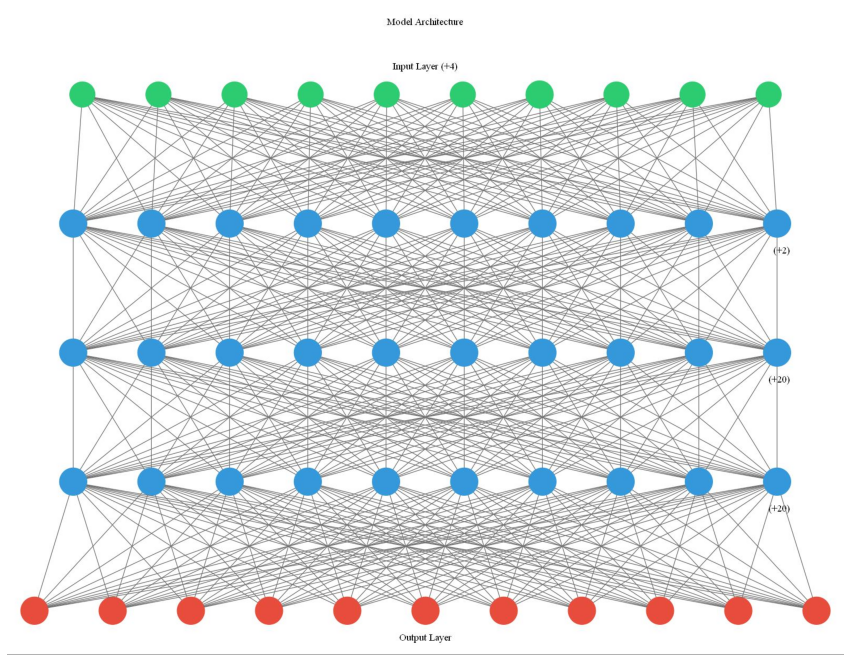

In [278]:
plt.figure(figsize=(15, 15))
neural_architecture = plt.imread('neural.jpg');
plt.imshow(neural_architecture);
plt.axis('off')
plt.show();

In [279]:
early_stop = EarlyStopping(patience=20, min_delta=0.001, restore_best_weights=True)

## Training

In [280]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks=[early_stop], epochs=200)

Epoch 1/200
450/450 [==============================] - 2s 2ms/step - loss: 1.9789 - accuracy: 0.3016 - val_loss: 1.7107 - val_accuracy: 0.3806
Epoch 2/200
450/450 [==============================] - 1s 2ms/step - loss: 1.6158 - accuracy: 0.4127 - val_loss: 1.5335 - val_accuracy: 0.4439
Epoch 3/200
450/450 [==============================] - 1s 2ms/step - loss: 1.4954 - accuracy: 0.4446 - val_loss: 1.4601 - val_accuracy: 0.4611
Epoch 4/200
450/450 [==============================] - 1s 2ms/step - loss: 1.4385 - accuracy: 0.4576 - val_loss: 1.4122 - val_accuracy: 0.4789
Epoch 5/200
450/450 [==============================] - 1s 2ms/step - loss: 1.4093 - accuracy: 0.4685 - val_loss: 1.3988 - val_accuracy: 0.4756
Epoch 6/200
450/450 [==============================] - 1s 2ms/step - loss: 1.3931 - accuracy: 0.4703 - val_loss: 1.4077 - val_accuracy: 0.4753
Epoch 7/200
450/450 [==============================] - 1s 2ms/step - loss: 1.3841 - accuracy: 0.4719 - val_loss: 1.3779 - val_accuracy: 0.4806

Epoch 58/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2398 - accuracy: 0.5226 - val_loss: 1.2533 - val_accuracy: 0.5231
Epoch 59/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2385 - accuracy: 0.5253 - val_loss: 1.2528 - val_accuracy: 0.5208
Epoch 60/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2384 - accuracy: 0.5233 - val_loss: 1.2529 - val_accuracy: 0.5264
Epoch 61/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2377 - accuracy: 0.5228 - val_loss: 1.2501 - val_accuracy: 0.5261
Epoch 62/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2375 - accuracy: 0.5210 - val_loss: 1.2456 - val_accuracy: 0.5308
Epoch 63/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2346 - accuracy: 0.5249 - val_loss: 1.2742 - val_accuracy: 0.5228
Epoch 64/200
450/450 [==============================] - 1s 2ms/step - loss: 1.2365 - accuracy: 0.5233 - val_loss: 1.2527 - val_accuracy:

Epoch 115/200
450/450 [==============================] - 2s 4ms/step - loss: 1.2038 - accuracy: 0.5329 - val_loss: 1.2464 - val_accuracy: 0.5353
Epoch 116/200
450/450 [==============================] - 1s 3ms/step - loss: 1.2012 - accuracy: 0.5356 - val_loss: 1.2449 - val_accuracy: 0.5250
Epoch 117/200
450/450 [==============================] - 2s 4ms/step - loss: 1.2002 - accuracy: 0.5358 - val_loss: 1.2528 - val_accuracy: 0.5242
Epoch 118/200
450/450 [==============================] - 2s 3ms/step - loss: 1.2012 - accuracy: 0.5372 - val_loss: 1.2415 - val_accuracy: 0.5300
Epoch 119/200
450/450 [==============================] - 2s 4ms/step - loss: 1.2006 - accuracy: 0.5353 - val_loss: 1.2524 - val_accuracy: 0.5217
Epoch 120/200
450/450 [==============================] - 1s 3ms/step - loss: 1.1998 - accuracy: 0.5377 - val_loss: 1.2469 - val_accuracy: 0.5231
Epoch 121/200
450/450 [==============================] - 2s 3ms/step - loss: 1.1985 - accuracy: 0.5362 - val_loss: 1.2395 - val_ac

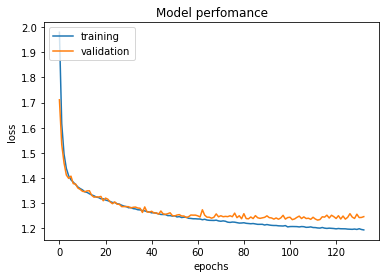

In [282]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model perfomance')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

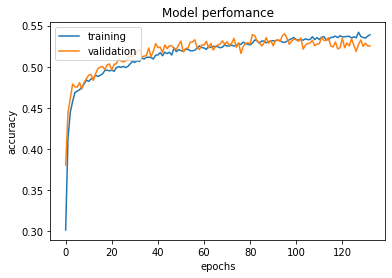

In [283]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model perfomance')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

et's print the accuracy and the corresponding error.

rint('Accuracy: {}% \n Error:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        
Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.

Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.

model.save('classification_model.h5')
Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.

When you are ready to use your model again, you use the load_model function from keras.models.

from keras.models import load_model
pretrained_model = load_model('classification_model.h5')

In [311]:
from sklearn.metrics import classification_report
pred = model.predict(X_valid)
print(classification_report(np.argmax(pred, axis=1), np.argmax(y_valid, axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       136
           1       0.01      0.40      0.03        10
           2       0.41      0.47      0.44       225
           3       0.73      0.87      0.79        75
           4       0.68      0.51      0.58        92
           5       0.65      0.66      0.66       281
           6       0.24      0.43      0.30       289
           7       0.93      0.97      0.95       115
           8       0.48      0.66      0.56       271
           9       0.55      0.52      0.54       534
          10       0.73      0.46      0.56      1572

    accuracy                           0.53      3600
   macro avg       0.57      0.60      0.56      3600
weighted avg       0.63      0.53      0.56      3600



In [312]:
model.save('musicgendermodel')

INFO:tensorflow:Assets written to: musicgendermodel\assets


In [313]:
from keras.models import load_model
pretrained_model = load_model('musicgendermodel')

In [315]:
pretrained_model.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 14),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_37_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_37',
    'trainable': True,
    'batch_input_shape': (None, 14),
    'dtype': 'float32',
    'units': 12,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_38',
    'trainable': True,
    'dtype': 'float32',
    'units': 30,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bi

In [317]:
pred2 = pretrained_model.predict(X_valid)
print(classification_report(np.argmax(pred2, axis=1), np.argmax(y_valid, axis=1)))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       136
           1       0.01      0.40      0.03        10
           2       0.41      0.47      0.44       225
           3       0.73      0.87      0.79        75
           4       0.68      0.51      0.58        92
           5       0.65      0.66      0.66       281
           6       0.24      0.43      0.30       289
           7       0.93      0.97      0.95       115
           8       0.48      0.66      0.56       271
           9       0.55      0.52      0.54       534
          10       0.73      0.46      0.56      1572

    accuracy                           0.53      3600
   macro avg       0.57      0.60      0.56      3600
weighted avg       0.63      0.53      0.56      3600

